In [78]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

In [85]:
# Retrieve simulation parameters

simulationParameters = np.loadtxt("simulationParameters.txt")

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = int(simulationParameters[3])
t = simulationParameters[4]
U = simulationParameters[5]
mu = simulationParameters[6]
totalMCSweeps = int(simulationParameters[7])
freq = int(simulationParameters[8])

# Load weights to plot

weightsNaive = np.loadtxt("weightsNaive.txt")

weightsUpdate = np.loadtxt("weightsUpdate.txt")

M = weightsNaive.size

time = np.arange(M)/NSITES/L   #measured in sweeps

directory1 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

directory2 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '/data-to-reproduce')
            
if not os.path.exists(directory1):
    os.makedirs(directory1)
    
if not os.path.exists(directory2):
    os.makedirs(directory2)
    
np.savetxt(directory2 + '/weightsNaive_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (weightsNaive))
np.savetxt(directory2 + '/weightsUpdate_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (weightsUpdate))
np.savetxt(directory2 + '/simulationParameters_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (simulationParameters))

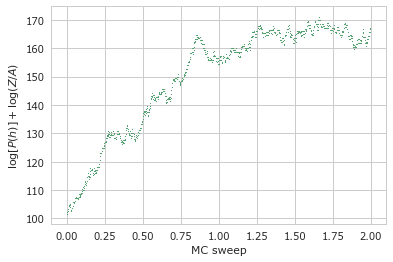

In [86]:
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
plt.scatter(time, np.log(weightsNaive), s = .5)
plt.scatter(time, np.log(weightsUpdate), s =.5)
plt.xlabel('MC sweep')
plt.ylabel(r'$\log [ P(h) ] + \log (Z/A)$')
plt.savefig(directory1 + '/weightsVsMCstep' + str(totalMCSweeps) + 'sweeps' + \
            '_freq_' + str(freq) + '.png', dpi = 600)